* Materia: Ciencia y Analítica de Datos.
* Nombre de la entrega: Actividad Semanal -- 7 Regresiones
* Fecha: 09/11/2022.
* Roberto Romero Vielma - A00822314
* Profesora titular: María de la Paz Rico Fernández
* Profesor tutor: Roberto Antonio Guevara González.

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [212]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [213]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [214]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

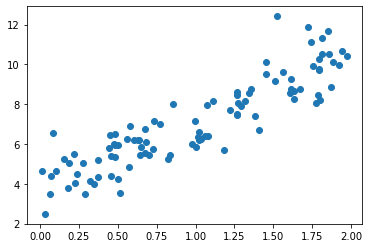

In [215]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [216]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [217]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [218]:
import warnings
warnings.filterwarnings("ignore")

In [219]:
#X_fit[]

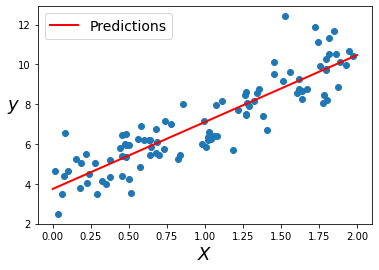

In [220]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [221]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [222]:
X_new.shape

(2, 1)

In [223]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [224]:
linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [225]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [226]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

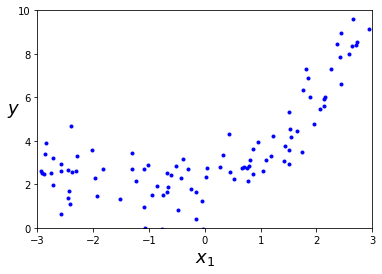

In [227]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [228]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [229]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [230]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [231]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [232]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [233]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

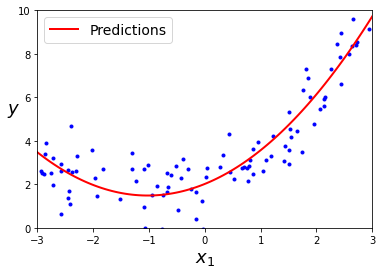

In [234]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [235]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [236]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [237]:
len(X)

1000

In [238]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

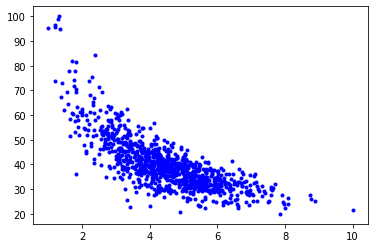

In [239]:
plt.plot(X,y,'b.')

In [240]:
from sklearn.model_selection import train_test_split
X_tv,X_test,y_tv,y_test=train_test_split(X,y,test_size=0.3,random_state=7)

# Regresión lineal

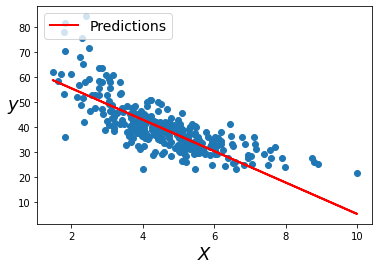

In [241]:
#lineal
from sklearn.linear_model import LinearRegression #traemos el módulo de regresión lineal

LR=LinearRegression() #creamos el objeto linear regression
LR.fit(X_tv,y_tv) #entrenamos los datos
y_pred_lin=LR.predict(X_test) #predecimos los valores con test

plt.scatter(X_test, y_test) #graficamos los datos originales
plt.plot(X_test, y_pred_lin, "r-", linewidth=2, label="Predictions") #con las predicciones
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

El modelo se ajusta a los datos, si observamos la tendencia, nos daremos cuenta que es negativa.

In [242]:
from sklearn import metrics #importmos las metricas a utilizar
from sklearn.metrics import r2_score

list_MAE=[] #creamos una lista donde vamos a guardar los mae
list_R2=[] #creamos otra lista para los R2

mae=metrics.mean_absolute_error(y_test, y_pred_lin) #calculamos el mae con la y_real y y_pred
r2=r2_score(y_test, y_pred_lin) #lo mismo con el r2

list_MAE.append(mae) #agregamos el resultado a la lista de MAE
list_R2.append(r2) #lo mismo con R2
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_lin))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lin)))
print('r2_score',r2_score(y_test, y_pred_lin))

Error medio Absoluto (MAE): 4.954556166990074
Root Mean Squared Error: 6.6928495737068285
r2_score 0.5719063437471217


In [243]:
LR.coef_, LR.intercept_ #Mostramos los coeficientes y el intercepto

(array([-6.26917022]), 67.92270858830854)

El modelo está dado por:

${\hat{y}=-6.26x+67.92}$

# Regresión polinomial

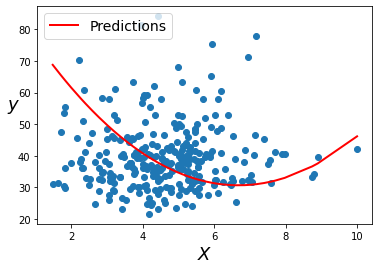

In [244]:
#polinomial
from sklearn.preprocessing import PolynomialFeatures #importamos el módulo para la regresión polinomial

poly=PolynomialFeatures(2) #el grado de complejidad del modelo

X_test.values.sort(axis=0) #acomodamos los valores para que la línea de la predicción no salga desacomodada
X_poly=poly.fit_transform(X_tv) #entrenamos y transformamos x_tv
X_poly_test=poly.fit_transform(X_test) # lo mismo con x_test


LR=LinearRegression()
LR.fit(X_poly,y_tv) #entrenamos el modelo con la x_tv hecha polinomial y y_tv


y_pred_poly=LR.predict(X_poly_test) #predecimos con los datos de prueba

plt.scatter(X_test, y_test) #graficamos los datos reales
plt.plot(X_test, y_pred_poly, "r-", linewidth=2, label="Predictions") #también las predicciones
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

La gráfica se ajusta bien a los datos

In [245]:
mae=metrics.mean_absolute_error(y_test, y_pred_poly) #obtenemos los errores
r2=r2_score(y_test, y_pred_poly)

list_MAE.append(mae)
list_R2.append(r2)
print('Error medio Absoluto (MAE):', mae) #mostramos los errores
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))
print('r2_score',r2)

Error medio Absoluto (MAE): 9.865084858349377
Root Mean Squared Error: 13.305376249622821
r2_score -0.6918855617081276


In [246]:
LR.coef_, LR.intercept_

(array([  0.        , -18.81578001,   1.40819027]), 93.47363822195226)

El modelo estará dado por:

${\hat{Y}=-18.81x+1.40x^2+93.47}$

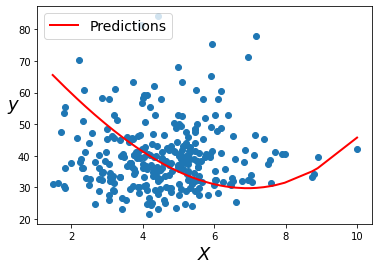

In [247]:
#ridge
from sklearn.linear_model import Ridge #importamos el modelo a usar
from sklearn.preprocessing import StandardScaler #es importante estandarizar, antes de usar ridge
from sklearn.pipeline import Pipeline #para evitar data leakage creamos un pipeline



model_ridge = Pipeline([("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("ridge", Ridge(alpha = 5, solver = 'cholesky', random_state = 42))]) #primero hacemos los valores de x polinomiales, seguido de escalarlos, al final aplicamos el modelo de ridge
model_ridge.fit(X_tv, y_tv)


y_pred_ridge = model_ridge.predict(X_test)

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_ridge, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Las predecciones se ajustan de manera similar a las vistas en la regresión polinomial

In [248]:
mae=metrics.mean_absolute_error(y_test, y_pred_ridge)
r2=r2_score(y_test, y_pred_ridge)

list_MAE.append(mae)
list_R2.append(r2)
print('Error medio Absoluto (MAE):', mae)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))
print('r2_score',r2)

Error medio Absoluto (MAE): 9.863527373419483
Root Mean Squared Error: 13.198928882649842
r2_score -0.6649225742122671


In [249]:
model_ridge.named_steps['ridge'].coef_, model_ridge.named_steps['ridge'].intercept_

(array([-16.62141288,   3.77660404,   5.20539106]), 40.24691190134286)

El modelo estará dado por:

${\hat{y}=-16.62x+3.77x^2+5.2x^3+40.24}$

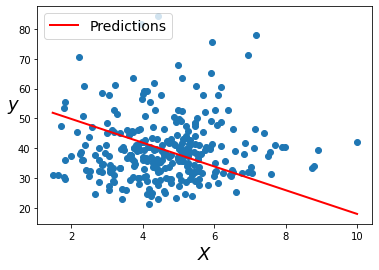

In [250]:
#lasso
from sklearn.linear_model import Lasso #importamos el modelo lasso




model_lasso = Pipeline([("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("lasso", Lasso(alpha = 3, random_state = 42))]) #dentro de nuestro pipeline ponemos al final el modelo lasso
model_lasso.fit(X_tv, y_tv)


y_pred_lasso = model_lasso.predict(X_test)

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_lasso, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

En este caso en particular se puede observar, que el modelo es demasiado simple como para poder predecir los valores de y, lo que indica que se requiere buscar los mejores hiperparámetros con el scorer ${R_2}$

In [251]:
mae=metrics.mean_absolute_error(y_test, y_pred_lasso)
r2=r2_score(y_test, y_pred_lasso)

list_MAE.append(mae)
list_R2.append(r2)
print('Error medio Absoluto (MAE):', mae)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))
print('r2_score',r2)

Error medio Absoluto (MAE): 8.895159300015763
Root Mean Squared Error: 11.805983649445764
r2_score -0.33205150934176686


In [252]:
model_lasso.named_steps['lasso'].coef_, model_lasso.named_steps['lasso'].intercept_ #pasamos la parte del pipeline que tiene los coeficientes y el intercepto

(array([-5.17335058, -0.        , -0.        ]), 40.24691190134286)

El modelo está dado por la ecuación:

${\hat{y}=-5.17x+40.24}$

Visualizamos los errores MAE

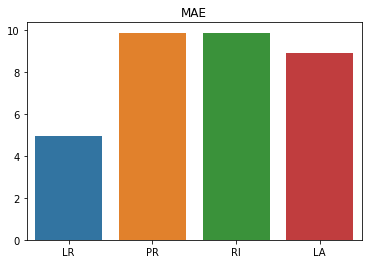

In [253]:
import seaborn as sns
list_names=["LR","PR","RI","LA"] #lista con los nombres de los errores
sns.barplot(x=list_names,y=list_MAE)
plt.title("MAE")
plt.show()

Visualizamos ahora ${R_2}$

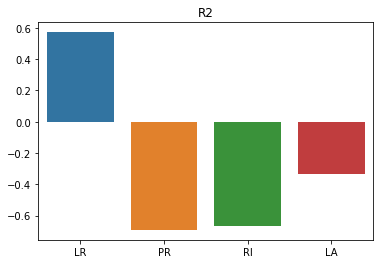

In [254]:
sns.barplot(x=list_names,y=list_R2)
plt.title("R2")
plt.show()

Por último la gráfica de residuos

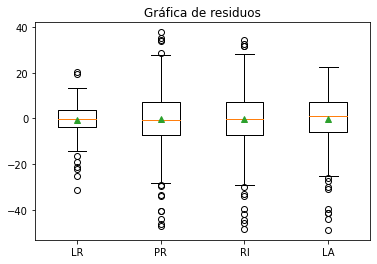

In [255]:
error_LR=y_pred_lin-y_test
error_PR=y_pred_poly-y_test
error_RI=y_pred_ridge-y_test
error_LA=y_pred_lasso-y_test
list_errors=[error_LR,error_PR,error_RI,error_LA]
plt.boxplot(list_errors,labels=list_names,showmeans=True)
plt.title("Gráfica de residuos")
plt.show()

# Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

En base a los resultados, el modelo que conviene más es el de la regresión lineal, dado que si observamos las gráficas, nos podremos dar cuenta que el MAE es más bajo en el modelo de regresión lineal, mientras menor sea el MAE, se tendrá un mejor resultado, adicionalmente la gráfica de ${R_2}$ muestra que el score de la regresión lineal es el más alto, teniendo un score cercano a 0.6, mientras que los demás modelos, dan scores negativos, lo que da a entender que los modelos están sobreentrenados y cuando se presenten valores desconocidos en nuestro modelo, los resultados tendrán errores muy grandes en la predicción.

La gráfica de residuos también nos confirma que el modelo de regresión lineal es el más adecuado, dado que su media está por encima de las demás, también presenta una menor dispersión, lo que indica que el modelo tiene un alto índice de predicciones correctas o cercanas.

Los porcentajes que utilice para la partición de los datos fueron de 70 para entrenamiento y el resto para prueba, lo hice de esa manera porque es la partición más común de los datos.

El error MAE más bajo que tengo es de 4.5 aproximadamente, en el modelo de regresión lineal y en los demás oscila entre 9 y 10. En ${R_2}$ solo el modelo de regresión lineal obtuvo un score positivo de 5.4, los demás tuvieron un score de -0.3 a -0.6. En el modelo de regresión lineal se obtuvo un MAE bueno, en comparación con los demás modelos, mientras menor sea el MAE, es mejor para el modelo, en tanto que con ${R_2}$ se obtuvo un resultado de 0.6 para el modelo lineal, lo que indica un buen desempeño, mientras más cercana sea ${R_2}$ a 1 mejor.


#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [256]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5954,7852020250,20140602T000000,725995.0,4,2.50,3190,7869,2.0,0,2,...,9,3190,0,2001,0,98065,47.5317,-121.866,2630,6739
8610,6392002020,20150324T000000,559000.0,3,1.75,1700,6500,1.0,0,0,...,8,1700,0,1967,0,98115,47.6837,-122.284,1880,6000
7650,626049058,20150504T000000,275000.0,5,2.50,2570,17234,1.0,0,0,...,7,1300,1270,1959,0,98133,47.7753,-122.355,1760,7969
5683,2202500255,20150305T000000,335000.0,3,2.00,1210,9926,1.0,0,0,...,7,1210,0,1954,2015,98006,47.5731,-122.135,1690,9737
20772,1972200428,20140625T000000,563500.0,3,2.50,1400,1312,3.5,0,0,...,8,1400,0,2007,0,98103,47.6534,-122.355,1350,1312
6959,723000114,20140505T000000,1395000.0,5,3.50,4010,8510,2.0,0,1,...,9,2850,1160,1971,0,98105,47.6578,-122.286,2610,6128
10784,4104900340,20150204T000000,710000.0,4,2.50,3220,18618,2.0,0,1,...,10,3220,0,1991,0,98056,47.5326,-122.181,2650,11896
21528,3416600750,20150217T000000,585000.0,3,2.50,1750,1381,3.0,0,0,...,8,1750,0,2008,0,98122,47.6021,-122.294,1940,4800
12319,2386000070,20141029T000000,795127.0,4,3.25,4360,91158,1.0,0,0,...,10,3360,1000,1993,0,98053,47.6398,-121.985,3540,90940
19947,1776460110,20141223T000000,395000.0,4,2.75,2280,5013,2.0,0,0,...,8,2280,0,2009,0,98019,47.7333,-121.976,2130,5121


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [258]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [259]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


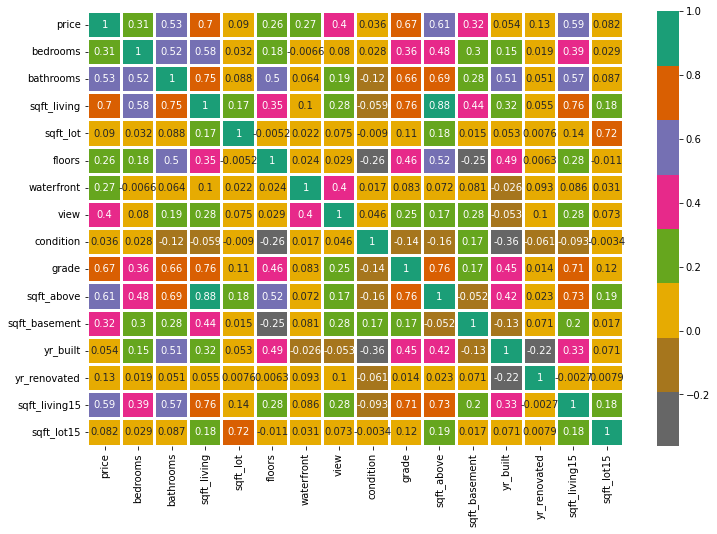

In [260]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [261]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [262]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


# Regresión lineal múltiple

In [263]:
LR.fit(X_train,y_train)

LinearRegression()

In [264]:
y_pred_mlr=LR.predict(X_test)

Coeficientes e intercepto

In [265]:
LR.coef_,LR.intercept_

(array([[-3.82008048e+04,  4.14661380e+04,  1.07992584e+02,
          1.71356997e-02,  3.16916913e+04,  5.52691023e+05,
          4.12493228e+04,  2.12221443e+04,  1.19493216e+05,
          4.77750271e+01,  6.02175565e+01, -3.55090216e+03,
          1.32602215e+01,  2.90059284e+01, -5.48132603e-01]]),
 array([6151359.2627409]))

El modelo estará dado por:

${\hat{y}=-3.82\times10^4x+...-5.48\times10^{-1}x+6151359.26}$

In [266]:
list_MAE=[] #creamos una lista para guardar los valores de los MAE
list_R2=[] #lo mismo con R2

mae=metrics.mean_absolute_error(y_test, y_pred_mlr)
r2=r2_score(y_test, y_pred_mlr)

list_MAE.append(mae)
list_R2.append(r2)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_mlr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr)))
print('r2_score',r2_score(y_test, y_pred_mlr))

Error medio Absoluto (MAE): 137480.1388273178
Root Mean Squared Error: 232133.3676240749
r2_score 0.6579723205007814


#Regresión Múltiple Polinomial



In [267]:
poly=PolynomialFeatures(2) #grado 2

X_poly=poly.fit_transform(X_train)
X_poly_test=poly.fit_transform(X_test)

LR.fit(X_poly,y_train)


y_pred_poly=LR.predict(X_poly_test)


In [268]:
LR.coef_,LR.intercept_

(array([[-3.36215067e+02,  9.33786601e+05, -1.09276012e+06,
         -5.00000916e+02, -2.78655818e+01, -2.07431876e+06,
         -3.95454208e+06, -2.88626046e+05,  5.58593032e+05,
          1.09860635e+06, -1.76306376e+02, -3.38830099e+02,
         -8.59690742e+04, -2.95364696e+03,  3.99966813e+03,
         -3.40100969e+01,  9.57353093e+02,  7.49573773e+03,
         -1.43129923e+01, -1.86055609e-02,  8.57765264e+03,
         -1.15023978e+04, -3.07568695e+02, -5.24425041e+03,
         -5.36756662e+03, -6.90375101e-01, -1.40883136e+01,
         -4.67027049e+02, -9.12671559e+00,  1.72774587e+01,
          2.15692510e-01, -9.63018996e+03,  1.55434606e+01,
         -1.35758634e-01, -2.59069352e+04,  4.33710369e+04,
          3.82965496e+03, -1.07945148e+03,  2.22974058e+04,
          1.42714685e+01,  1.18111267e+00,  5.03113646e+02,
         -1.70855006e+01, -1.72874822e+01, -5.57330742e-02,
         -4.95300818e-01, -1.18373560e+00,  4.83455018e+00,
          1.60300634e+02, -1.42701954e+0

El modelo estará dado por:

${\hat{y}=-3.36\times10^2x_1+...+2.35\times10^{-6}x^2_{15}+80233537.22}$

In [269]:
mae=metrics.mean_absolute_error(y_test, y_pred_poly)
r2=r2_score(y_test, y_pred_poly)

list_MAE.append(mae)
list_R2.append(r2)
print('Error medio Absoluto (MAE):', mae)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))
print('r2_score',r2)

Error medio Absoluto (MAE): 121313.19643053468
Root Mean Squared Error: 186263.02675855052
r2_score 0.7797887906321873


# Ridge

In [270]:
model_ridge = Pipeline([("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("ridge", Ridge(alpha = 5, solver = 'cholesky', random_state = 42))])
model_ridge.fit(X_train, y_train)


y_pred_ridge = model_ridge.predict(X_test)

In [271]:
model_ridge.named_steps['ridge'].coef_, model_ridge.named_steps['ridge'].intercept_

(array([[ 1.52987992e+05, -1.66507179e+04,  3.81408725e+04,
         -1.61078273e+05, -3.38621301e+04, -5.02036856e+04,
         -2.25935457e+04,  1.48318806e+05,  1.69552788e+05,
          1.46622629e+04,  5.15517014e+04, -1.61064083e+05,
         -9.33327037e+04,  2.74916549e+05, -9.04779793e+04,
          1.03902685e+04, -4.04556045e+03, -2.90785769e+04,
         -2.45971207e+04,  1.69484006e+04, -6.14885037e+03,
          6.94864686e+02, -3.04207501e+03, -4.12873845e+04,
         -2.10332884e+04, -2.89529432e+04, -1.52046664e+05,
         -1.60045095e+03,  6.08464016e+04,  2.29402252e+04,
         -5.29873832e+03,  5.40251460e+04, -1.16961854e+02,
         -4.56416687e+04,  1.35417485e+04,  9.72341176e+03,
         -4.49155470e+04,  1.36781410e+05,  6.40862002e+04,
         -2.36464532e+03,  1.84342264e+04, -2.45759264e+04,
         -8.27676641e+04,  6.19474783e+03,  1.04800311e+04,
         -3.22762330e+04,  5.04856446e+02,  3.81611969e+04,
         -2.75607011e+04,  2.80829361e+0

El modelo estará dado por:

${\hat{y}=1.52\times10^5x_1+...+2.08\times10^{4}x^2_{15}+539150.73}$

In [272]:
mae=metrics.mean_absolute_error(y_test, y_pred_ridge)
r2=r2_score(y_test, y_pred_ridge)

list_MAE.append(mae)
list_R2.append(r2)
print('Error medio Absoluto (MAE):', mae)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))
print('r2_score',r2)

Error medio Absoluto (MAE): 122250.06187113284
Root Mean Squared Error: 187899.3792334001
r2_score 0.7759026087978058


# Lasso

In [273]:
model_lasso = Pipeline([("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("lasso", Lasso(alpha = 3, random_state = 42))])
model_lasso.fit(X_train, y_train)


y_pred_lasso = model_lasso.predict(X_test)

In [274]:
model_lasso.named_steps['lasso'].coef_, model_lasso.named_steps['lasso'].intercept_

(array([ 1.90911191e+05,  8.66722760e+04,  1.31899809e+05,  2.72391646e+04,
        -1.07939619e+05,  4.42139671e+04,  1.28346035e+05,  1.42116172e+05,
         1.61215891e+05, -7.24861542e+04, -1.05784411e+05, -1.62939988e+05,
        -5.78684162e+04,  1.49838689e+05, -2.66580324e+04, -3.17218128e+04,
        -6.98529016e+04, -5.95482074e+04,  2.44679174e+04,  8.66836198e+04,
        -7.88081731e+04, -5.30681736e+04, -5.87893095e+04, -2.27021809e+04,
         5.41732078e+02,  2.21117293e+04, -5.40585149e+04,  5.59961574e+04,
         4.95371175e+04,  2.92203473e+04,  3.93974543e+04,  5.50738036e+04,
         1.71811493e+04, -4.08744398e+04,  8.84246979e+03,  2.15466712e+04,
         1.25253874e+04, -9.95382280e+03,  1.11833767e+04,  1.33519056e+04,
        -4.06505625e+04, -7.21927472e+04,  2.37080470e+04,  5.74471382e+03,
        -4.59344628e+04, -2.35899179e+03,  2.85325500e+04,  2.42685438e+04,
        -4.30000948e+04, -2.33274197e+04,  6.41591070e+04, -4.80379640e+04,
        -6.6

El modelo estará dado por:

${\hat{y}=1.90\times10^5x_1+...-7.29\times10^{4}x^3_{15}+539150.73}$

In [275]:
mae=metrics.mean_absolute_error(y_test, y_pred_lasso)
r2=r2_score(y_test, y_pred_lasso)

list_MAE.append(mae)
list_R2.append(r2)
print('Error medio Absoluto (MAE):', mae)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))
print('r2_score',r2)

Error medio Absoluto (MAE): 121540.01378912927
Root Mean Squared Error: 189171.8518971228
r2_score 0.7728571132403553


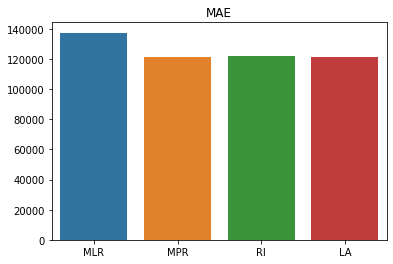

In [276]:
list_names=["MLR","MPR","RI","LA"]
sns.barplot(x=list_names,y=list_MAE)
plt.title("MAE")
plt.show()

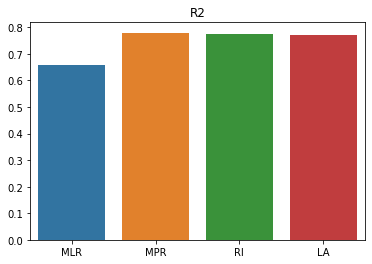

In [277]:
sns.barplot(x=list_names,y=list_R2)
plt.title("R2")
plt.show()

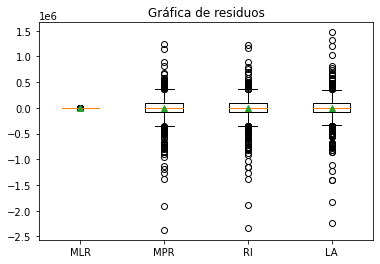

In [278]:
error_MLR=y_pred_mlr-y_test
error_PR=y_pred_poly-y_test
error_RI=y_pred_ridge-y_test
error_LA=y_pred_lasso.reshape(len(y_test),1)-y_test
list_errors=[error_LR,error_PR,error_RI,error_LA]
plt.boxplot(list_errors,labels=list_names,showmeans=True)
plt.title("Gráfica de residuos")
plt.show()

# Explica tus resultados, que método se aproxima mejor, ¿por qué?, ¿qué porcentajes de entrenamiento y evaluación usaste? ¿Que error tienes?, ¿es bueno?, ¿Cómo lo sabes? 

El modelo que se aproxima mejor en mi opinión es el de la regresión polinomial múltiple, si observamos las métricas de MAE y ${R_2}$, podemos darnos cuenta que el MAE es el más bajo, mientras que el score de ${R_2}$ es el más alto, mientras menor sea el MAE mejor y el ${R_2}$ que más se acerque a 1 es el ideal.

El test size usado es el que venía por defecto en el notebook (del 10%) y el resto de los datos conforman el 90%, el error que se tiene en el MAE de los modelos está en el rango de 120 mil a 140 mil, en tanto que el ${R_2}$ score está entre 0.6 y 0.8, ninguno de los modelos está sobreentrenado en base a las métricas usadas. Los errores que se tienen son buenos, solo en el modelo de la regresión lineal múltiple se tiene un MAE malo, la forma en la que se que los resultados son buenos, se basa en que el MAE mientras más cercano sea a 0 mejor y en la métrica de ${R_2}$ mientras más cercana sea a 1 mejor.
# Conclusiones
Mientras el MAE sea más cercano a 0, el modelo lineal es mejor, en tanto que la ${R_2}$ indicará un mejor modelo mientras más se acerque a 1, y en caso de dar resultados negativos se considerará que el modelo está sobreentrenado, los modelos desarrollados a lo largo de los 2 ejercicios dejan en claro que los datos usados no requieren de funciones como Ridge y Lasso para obtener buenos modelos lineales, también es importante mencionar que las ecuaciones se volverán más complejas a medida que se aumente el grado y el número de variables dentro del modelo.

#Referencias bibligráficas
Wesner, J. (2021). MAE and RMSE — Which Metric is Better? - Human in a Machine World. Medium. https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d